# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [Victor Cilleros]([link](https://github.com/VictorCilleros))
- [Victor Niaussat]([link](https://github.com/Niossa))

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [2]:
import numpy as np
Generator = np.random.default_rng(84522)
sizeW,N=(5,100)
Norm_List = Generator.normal(size = (sizeW,N))
Norm_List

array([[ 1.11522247e+00, -4.35638008e-04,  2.00026055e+00,
        -1.47024317e+00,  1.02428617e+00, -4.56633015e-01,
         1.18361064e+00,  1.90139267e+00,  4.52868126e-01,
         1.23267157e+00,  8.78945524e-01, -4.86992803e-02,
         1.36810944e+00, -4.88315961e-01, -3.21000369e-01,
         4.80459453e-01, -8.93763852e-01,  4.67886879e-01,
         3.40385371e-01,  6.21334483e-01,  2.61854871e-01,
         6.97730254e-01, -7.29180259e-01,  2.64398897e-01,
         3.18438389e-02,  2.01088413e-01,  8.58352381e-01,
        -3.11754921e-01, -1.57338558e-02,  6.49682701e-01,
        -1.84265833e-01, -1.02424455e+00, -9.25214717e-01,
         1.25776484e+00, -5.78777450e-01,  1.39912870e+00,
        -9.23744384e-01,  3.92558142e-01,  1.49110187e-01,
         1.26868825e+00, -8.15511327e-01, -1.22256227e+00,
        -1.16223521e+00,  1.13317569e+00,  4.33690701e-02,
         2.21073526e-01,  1.39498956e-01, -1.16318552e+00,
         2.59217245e-01,  5.55660456e-01, -3.47007473e-0

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

**Answer:**

In [3]:
def brownian_motion(niter, x, step, rng):
    Norm_List = rng.normal(size = (niter,len(x)))
    W =[x]
    for i in range(niter):
        W.append(W[i]+np.sqrt(step)*Norm_List[i])
    return(np.array(W))

In [4]:
from matplotlib import pyplot as plt

niter=1000
x=[0,2]
step = 1

Bm = brownian_motion(niter, x, step, Generator)

plt.style.use("ggplot")
plt.plot(Bm,label='Valeur d\'une coordonnée')
plt.legend()
plt.title("Evolution des coordonnées de x")
plt.show()

<Figure size 640x480 with 1 Axes>

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

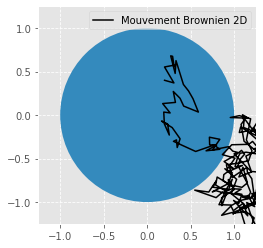

In [9]:
from matplotlib import pyplot as plt

niter=1000
x=[0.2,0.4]
step = 1e-2

Bm = brownian_motion(niter, x, step, Generator)

plt.style.use("ggplot")


circle = plt.Circle((0,0), 1)
fig, ax = plt.subplots()
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1)
plt.plot(Bm.T[0],Bm.T[1],color = 'black',label="Mouvement Brownien 2D")
plt.legend()
ax.set_aspect(1)
ax.add_artist(circle)

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

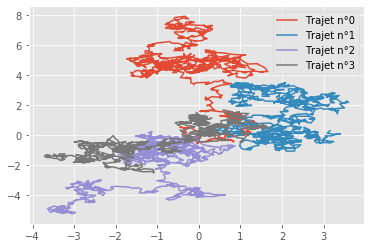

In [15]:
from matplotlib import pyplot as plt

niter=1000
x=[0,0,0,0]
step = 0.01
for i in range(4):
    Bm = brownian_motion(niter, x, step, Generator)
    plt.plot(Bm.T[0],Bm.T[1],label='Trajet n°'+str(i))
plt.legend()


5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [29]:
def brownian_motion(niter, x, step, rng):
    Norm_List = rng.normal(size = (niter,len(x)))
    W =[x]
    for i in range(niter):
        W.append(W[i]+np.sqrt(step)*Norm_List[i])
    return(np.array(W)) 

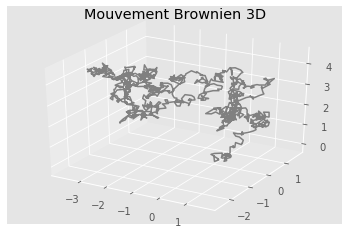

In [30]:
from mpl_toolkits import mplot3d
niter=1000
x=[0,0,0,0]
step = 0.01

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(Bm.T[0], Bm.T[1], Bm.T[2], 'gray')
plt.title("Mouvement Brownien 3D")
plt.show()


---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `X/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

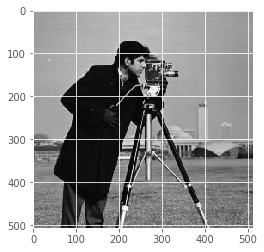

In [32]:
from PIL import Image

X = plt.imread(".\img\\cameraman.png")

plt.imshow(X,cmap = "gray")

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

In [33]:
FFT = np.fft.fft2(X)
print("La fréquence nulle est en haut à gauche au pixel (0,0)") 

La fréquence nulle est en haut à gauche au pixel (0,0)


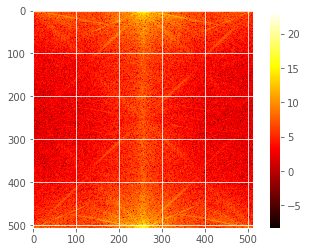

In [41]:
#Implémenté avec fftshift

FFT_shift =np.fft.fftshift(FFT,axes =(1,))
Density_shift = np.abs(FFT_shift)**2
LogDensity = np.log(Density_shift)


plt.imshow(LogDensity,vmin = np.min(LogDensity),vmax=np.max(LogDensity),cmap = "hot")
plt.colorbar()



3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

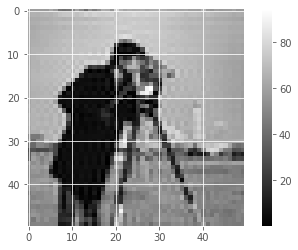

In [43]:
def ideal_lowpass_filter(X,fc =(50,50)):
    FFt = np.fft.fftshift(np.fft.fft2(X))
    M,N = np.shape(FFt)
    FFTLowPassX = FFt[M//2-fc[0]//2 :M//2+fc[0]//2 ,N//2-fc[1]//2:N//2+fc[1]//2 ]
    X_LowPassFiltered = np.fft.ifft2(FFTLowPassX)
    return(X_LowPassFiltered)

X_low = np.abs(ideal_lowpass_filter(X))
plt.imshow(X_low, cmap = "gray")
plt.colorbar()

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} =P_1^* \bigg( \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \bigg) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform and $P_1^*$ is a cropping operator (adjoint of $P_1$). 

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis).

In [82]:
M1,N1 = np.shape(X)
M2,N2 = np.shape(H)
M,N = M1+M2-1,N1+N2-1

def zero_padding(X,M,N):
    Mi,Ni = np.shape(X)
    return(np.concatenate([
        np.concatenate(
            [X,np.zeros((Mi,N-Ni))],axis=1),
        np.zeros((M-Mi,N))]))
    pass






516 522


(516, 522)

**Answer:**

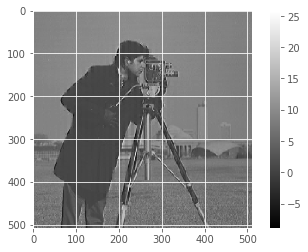

In [107]:
M1,N1 = np.shape(X)
M2,N2 = 2,2
M,N = M1+M2-1,N1+N2-1

sigmam,sigman = 10,10
Generatorx,Generatory = np.random.default_rng(43334),np.random.default_rng(74)
wy,wx =Generatory.normal(scale=sigmam,size = (M2,1)), Generatorx.normal(scale=sigman,size =(N2,1))

H = wy@wx.T

P1=zero_padding(X,M,N)
P2=zero_padding(H,M,N)

Out_gaussian = np.fft.irfft2(np.fft.rfft2(P1)*np.fft.rfft2(P2))

plt.imshow(Out_gaussian,cmap = "gray")
plt.colorbar()